In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 5
from scipy.stats import mode
import seaborn as sns

#### 연습문제 cars 데이터셋을 이용하시요.(문제에 해당하는 함수를 직접 사용하지 말것)

In [2]:
df = pd.read_csv( 'data/cars.csv', index_col='Unnamed: 0')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


#### 1.  speed, dist의 도수분포표를 그리고 시각화 하시오.

#### speed 도수분포표

In [3]:
speed        = df['speed'].values
freq, r      = np.histogram( speed, bins=5, range=(0, 25) )
freq_class   = [f'{i}~{i+5}' for i in range(0, 25, 5)]
freq_dist_df = pd.DataFrame({'빈도':freq},index=pd.Index(freq_class,name='계급'))
class_value  = [ (i+(i+5))//2 for i in range(0, 25, 5) ]
rel_freq     = freq / freq.sum()
cum_rel_freq = np.cumsum( rel_freq )

freq_dist_df['계급값']           = class_value 
freq_dist_df['상대 도수']        = rel_freq 
freq_dist_df['누적 상대 도수']   = cum_rel_freq 
freq_dist_df                 

,빈도,계급값,상대 도수,누적 상대 도수
계급,,,,
0~5,2,2,0.04,0.04
5~10,4,7,0.08,0.12
10~15,17,12,0.34,0.46
15~20,15,17,0.30,0.76
20~25,12,22,0.24,1.00


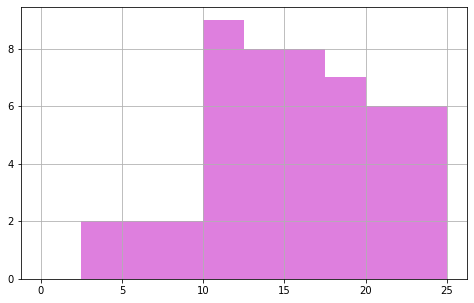

빈도수= [ 2  4 17 15 12]
계급 구간= [ 0.  5. 10. 15. 20. 25.]


In [4]:
plt.hist(speed, bins=10, range=(0,25), color='m', alpha=.5)
plt.grid()
plt.show()
print('빈도수=', freq);print('계급 구간=', r)

#### dist 도수분포표

In [5]:
dist           = df['dist'].values
freq_d, r_d    = np.histogram( dist, bins=12, range=(0,120) )
freq_class_d   = [f'{i}~{i+10}' for i in range(0, 120, 10)]
freq_dist_df_d = pd.DataFrame({'빈도':freq_d},index=pd.Index(freq_class_d, name='계급'))
class_value_d  = [ (i+(i+10))//2 for i in range(0, 120, 10) ]
rel_freq_d     = freq_d / freq_d.sum()
cum_rel_freq_d = np.cumsum( rel_freq_d )

freq_dist_df_d['계급값']           = class_value_d
freq_dist_df_d['상대 도수']        = rel_freq_d 
freq_dist_df_d['누적 상대 도수']   = cum_rel_freq_d
freq_dist_df_d

,빈도,계급값,상대 도수,누적 상대 도수
계급,,,,
0~10,2,5,0.04,0.04
10~20,6,15,0.12,0.16
20~30,10,25,0.20,0.36
30~40,8,35,0.16,0.52
40~50,6,45,0.12,0.64
50~60,6,55,0.12,0.76
60~70,4,65,0.08,0.84
70~80,2,75,0.04,0.88
80~90,3,85,0.06,0.94


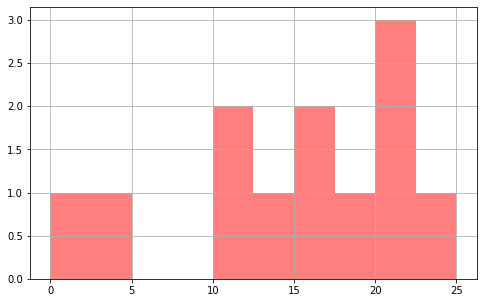

빈도수= [ 2  6 10  8  6  6  4  2  3  2  0  1]
계급 구간= [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120.]


In [6]:
plt.hist(dist, bins=10, range=(0,25), color='r', alpha=.5)
plt.grid()
plt.show()
print('빈도수=', freq_d);print('계급 구간=', r_d)

#### 2. 대표값 3개를 구하시오. (평균,중앙값,최빈값)

#### 평균

In [7]:
df.sum()/len(df)

speed    15.40
dist     42.98
dtype: float64

In [8]:
df.mean()

speed    15.40
dist     42.98
dtype: float64

#### 중앙값

In [9]:
n = len(np.sort(df['speed']))
if n % 2 == 0:   # 짝수(even)
    m0 = np.sort(df['speed'])[n//2-1]
    m1 = np.sort(df['speed'])[n//2]
    median = (m0 + m1) / 2
else:           # 홀수(odd)
    median = np.sort(df)[(n+1)//2 - 1]
median

15.0

In [10]:
n = len(np.sort(df['dist']))
if n % 2 == 0:   # 짝수(even)
    m0 = np.sort(df['dist'])[n//2-1]
    m1 = np.sort(df['dist'])[n//2]
    median = (m0 + m1) / 2
else:           # 홀수(odd)
    median = np.sort(df)[(n+1)//2 - 1]
median

36.0

In [11]:
np.median(df['speed']), np.median(df['dist']), 

(15.0, 36.0)

#### 최빈값

In [12]:
x = mode(df['speed'])
print(x[0], x[1]) 

[20] [5]


In [13]:
dt, c = np.unique(df['speed'], return_counts=True)
for x, y in zip(dt, c):
    print(x,y)

4 2
7 2
8 1
9 1
10 3
11 2
12 4
13 4
14 4
15 3
16 2
17 3
18 4
19 3
20 5
22 1
23 1
24 4
25 1


#### 3. 분산, 표준편차를 구하시오.

#### 모분산

In [14]:
(( df - df.mean() )**2).mean()

speed     27.4000
dist     650.7796
dtype: float64

In [15]:
(( df - df.mean() )**2).sum()/len(( df - df.mean() )**2)

speed     27.4000
dist     650.7796
dtype: float64

In [16]:
df.var(ddof=0)

speed     27.4000
dist     650.7796
dtype: float64

#### 모표준편차

In [17]:
np.sqrt( (( df - df.mean() )**2).mean() )

speed     5.234501
dist     25.510382
dtype: float64

In [18]:
np.sqrt((( df - df.mean() )**2).sum()/len(( df - df.mean() )**2))

speed     5.234501
dist     25.510382
dtype: float64

In [19]:
df.std(ddof=0) 

speed     5.234501
dist     25.510382
dtype: float64

#### 4. 공분산을 구하시오.

In [20]:
def covariance(x, y):
    ax, ay = x.mean(), y.mean()
    data   = [(ax-x)*(ay-y) for x, y in zip(x,y)]
    return sum(data) / len(x)

In [21]:
covariance(df['speed'], df['speed'])

27.399999999999995

In [22]:
covariance(df['dist'], df['dist'])

650.7796000000001

In [23]:
covariance(df['speed'], df['dist'])

107.748

In [24]:
np.cov( df['speed'], df['dist'], ddof=0 )

array([[ 27.4   , 107.748 ],
       [107.748 , 650.7796]])

#### 5. cars데이터를 정규화 하시오.  표폰정규분포 N(0,1)

In [25]:
result = (df - df.mean()) / df.std()
result.head()

,speed,dist
1,-2.155969,-1.590260
2,-2.155969,-1.279814
3,-1.588609,-1.512648
4,-1.588609,-0.814145
5,-1.399489,-1.046979


In [26]:
result.mean(), result.std()

(speed   -9.325873e-17
 dist     1.421085e-16
 dtype: float64,
 speed    1.0
 dist     1.0
 dtype: float64)

#### 6. 상관계수를 구하고 히트맵을 그리시오.

In [27]:
round( np.cov( df['speed'], df['dist'], ddof=0 )[0,1]/( np.std( df['speed'])*np.std(df['dist']) ), 2)

0.81

In [28]:
round(df.corr(), 2)

,speed,dist
speed,1.00,0.81
dist,0.81,1.00


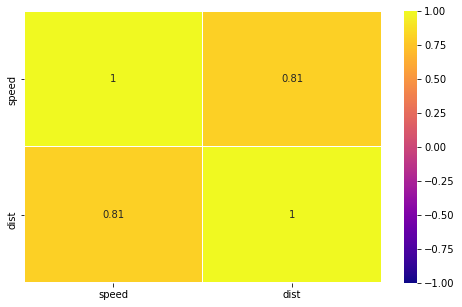

In [29]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='plasma')
plt.show()